In [ ]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/Colab Notebooks/likelion_proj_finalproj'

Mounted at /content/drive


In [ ]:
! pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 86.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 1. 데이터 로드

네이버에서 '반려동물'이라는 키워드로 2020-2022 기사 데이터를 크롤링해왔습니다. 

In [ ]:
news1= pd.read_csv(f'{base_path}/2020.01.01_2020.12.31_1.csv')
news1.head(10)

,0
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소
3,"“우리 아이와 반려동물, 함께 생활해도 괜찮을까?”"
4,"[영상]반려동물 식품의 세계화 ""정부지원 받아 글로벌기업으로 우뚝"""
5,배스 사들여 반려동물식품 제조…빈집 고쳐 장기거주 사회주택 제공
6,"반려동물도 코로나블루? 쿠쿠전자 넬로, 팻케어 제품 수요 증가"
7,2021년부터 동물보호법 상 맹견은 책임보험 의무화
8,[웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다
9,"지솔펫, 반려동물을 위한 살균·소독·향균 탈취제 선보여"


In [ ]:
news2 = pd.read_csv(f'{base_path}/2021.01.01_2021.12.31_1.csv')
news2.head(10)

,0
0,이재명 코로나 거점 전담병원 방문…‘반려동물’ 유튜브 출연
1,반려동물 함께 즐기는 스타벅스 더북한강R 점 오픈
2,"잔인한 방법으로 개 도살, 허가 없이 번식도…동물 학대 적발"
3,"반려동물도 코로나 감염…""확진자 재택치료시 분리해야"""
4,올해 최다 이용 반려동물 앱 1위는 펫프렌즈
5,반려동물은 제2의 고객… 펫팸족 공략나선 LCC
6,‘면적 제한 폐지’ 농지원부 작성 의무화... 동물보건사 자격제도 시행
7,"울산 남구, 반려동물정책계·치매관리계 신설…조직개편 단행"
8,"허은아 ""이재명, 반려견 '이행복'은 어디에..동물에 대한 애정 없어"""
9,스파이더맨 보러 간 영화관 팝콘 속에서 나온 '햄스터' 반려동물로 입양한 소...


In [ ]:
news3 = pd.read_csv(f'{base_path}/2022.01.01_2022.12.25_1.csv')
news3.head(10)

,0
0,"尹대통령, 은퇴 안내견 입양…관저에 11번째 동물 식구(종합)"
1,"윤 대통령 부부, 은퇴 안내견 '새롬이' 입양… 11번째 반려동물"
2,[영상]부산 1호 반려동물 테마파크...주민들이 반대하는 이유
3,[정치톡톡] 정치권 성탄 메시지 / '민주당의 길' 출범 / 대통령 11번째 반려동...
4,'동물복지 조례·보호센터 직영 운영'…사람과 동물이 행복한 고양시
5,'TV동물농장' 뒷다리 마비 웰시코기 '장수'
6,경기도반려동물테마파크의 배신?… 지원시설 빼고 추모관뿐
7,"볼보자동차, 서울시에 반려동물 물품 5천만원 상당 기부"
8,"서울시, 반려동물 '사료검정기관' 지정…전국 지자체 중 최초"
9,삶이 위태로운 야생동물의 똥이 우리에게 하는 말 [반려인의 오후]


In [ ]:
news1.shape, news2.shape, news3.shape

((4000, 1), (4000, 1), (4000, 1))

In [ ]:
# 중복값 제거
news_2020 = news1.drop_duplicates()["0"]
news_2021 = news2.drop_duplicates()["0"]
news_2022 = news3.drop_duplicates()["0"]

In [ ]:
news_2020.shape, news_2021.shape, news_2022.shape

((2850,), (2816,), (2852,))

In [ ]:
news_2020.head(10)

0               은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영
1        새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2                          반려식물로 코로나 우울 해소
3             “우리 아이와 반려동물, 함께 생활해도 괜찮을까?”
4    [영상]반려동물 식품의 세계화 "정부지원 받아 글로벌기업으로 우뚝"
5      배스 사들여 반려동물식품 제조…빈집 고쳐 장기거주 사회주택 제공
6       반려동물도 코로나블루? 쿠쿠전자 넬로, 팻케어 제품 수요 증가
7             2021년부터 동물보호법 상 맹견은 책임보험 의무화
8                 [웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다
9           지솔펫, 반려동물을 위한 살균·소독·향균 탈취제 선보여
Name: 0, dtype: object

In [ ]:
#특허 데이터 로드

kipris = pd.read_csv(f"{base_path}/kipris.csv")
kipris = kipris[["발명의명칭", "출원일자"]]
kipris.head(10)

,발명의명칭,출원일자
0,반려동물용 항산화 보조제 및 그 제조 방법(antioxidant supplement...,2021.11.01
1,스마트폰을 이용한 반려동물 미용샵 예약관리 시스템 및 방법(RESERVATION S...,2019.08.18
2,"반려동물의 3D 복원 및 감정 분석을 통한 컨텐츠 제공 서버, 사용자 단말 및 그 ...",2020.07.02
3,딥러닝을 이용한 반려동물 질환 추론 모듈 및 전자 장치(A method and el...,2021.04.06
4,스마트 반려동물 배변패드 처리장치(Smart companion animal defe...,2022.05.17
5,반려동물 위생 및 건강관리 기기장치(Sanitary Management and He...,2019.03.11
6,반려동물의 심리 및 성격유형검사 제공시스템(Companion animal's psy...,2021.04.15
7,반려동물 자동 배변 밀폐 처리장치(Pet automatic excretion sea...,2015.06.03
8,반려동물 전문 인력 매칭 및 종합 지원 시스템 및 방법(SYSTEM AND METH...,2019.03.13
9,반려동물 질병 추론 시스템 및 그 방법(System for inferencing d...,2021.06.11


In [ ]:
# 시계열 넣기

kipris["출원일자"] = pd.to_datetime(kipris["출원일자"])
kipris["출원일자"] = kipris["출원일자"].dt.year
kipris.columns = ['제목', '날짜']

## 2. 전처리

In [ ]:
# 특허 데이터 전처리
# 관련 출처: https://colab.research.google.com/drive/1biKqnXWMMuyEwr-oW6VZV5rSBEEghk3u?usp=sharing

import re

def preprocessing(text):
    text = re.sub(r"[^가-힣0-9\s]", " ", text) #한글이랑 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text) #중복 공백 없애기
    text = text.strip() #앞뒤 공백 없애기
    return text

from tqdm import tqdm
tqdm.pandas()

kipris["제목"] = kipris["제목"].progress_map(preprocessing)

100%|██████████| 7481/7481 [00:00<00:00, 87758.92it/s]


In [ ]:
kipris.duplicated(subset=["제목"]).sum()

997

In [ ]:
kipris = kipris.drop_duplicates(['제목'])

In [ ]:
kipris["분류"] = "특허"

<ipython-input-20-f861e6e84543>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kipris["분류"] = "특허"


In [ ]:
# 뉴스 데이터 전처리

news1["날짜"] = 2020
news2["날짜"] = 2021
news3["날짜"] = 2022

news = pd.concat([news1, news2, news3])

news.rename(columns = {'0' : '제목'}, inplace = True)

news["제목"] = news["제목"].progress_map(preprocessing)

news.duplicated(subset=["제목"]).sum()

100%|██████████| 12000/12000 [00:00<00:00, 157600.12it/s]


3681

In [ ]:
news = news.drop_duplicates(['제목'])

In [ ]:
news["분류"] = "뉴스"

In [ ]:
# 전처리 완료한 데이터셋 저장
df = pd.concat([news, kipris])
df = df.reset_index(drop=True, inplace=False)
df.sample(20)

,제목,날짜,분류
13913,멜라노코르틴 4 수용체 조절제로서의 아실화 스피로피페리딘 유도체 및 이를 포함하는 ...,2006,특허
8658,반려동물 건강 관리 시스템,2020,특허
5291,반려동물 가구 600만 시대 종근당바이오 카카오 정기 구독 서비스 오픈,2021,뉴스
10694,기호성이 개선된 반려견의 관절염 예방 및 치료용 연질 캡슐,2018,특허
2055,아워박스 반려용품 물류시장 본격 진출,2020,뉴스
8908,반려동물 하우징을 구비한 전기자전거,2018,특허
5747,핏펫 반려동물 아플 때 꼭 필요한 케어 서비스 론칭,2022,뉴스
13170,놀이 기구로도 사용할 수 있는 고양이 집,2020,특허
13148,폐지를 이용한 재생 제품의 제조방법,2020,특허
14274,아드레날린 수용체 조절 화합물 및 이의 사용 방법,2017,특허


In [ ]:
# 앞선 2020-2022 데이터들을 모두 합쳐서 3년 동안 '반려동물' 뉴스 기사 데이터를 형성하겠습니다.

all_news=pd.concat([news_2020, news_2021, news_2022])

In [ ]:
all_news.shape

(8518,)

In [ ]:
all_news

0                  은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영
1           새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2                             반려식물로 코로나 우울 해소
3                “우리 아이와 반려동물, 함께 생활해도 괜찮을까?”
4       [영상]반려동물 식품의 세계화 "정부지원 받아 글로벌기업으로 우뚝"
                        ...                  
3995             美 펫푸드협회, 반려동물 장수 위한 펫푸드 팁 소개
3996                수원시, 반려동물 문화교실 참여자 선착순 모집
3997         정황근 장관 “반려동물산업・스마트팜 등 규제 대못 뽑겠다”
3998                 반려동물 사고 예방 '펫티켓 운동' 확산돼야
3999       임실군, 오수지구 도시재생 활성화…반려동물 친화 거점도시 조성
Name: 0, Length: 8518, dtype: object

In [ ]:
df_all_news = all_news.to_frame(name="title")
df_all_news.head(10)

,title
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소
3,"“우리 아이와 반려동물, 함께 생활해도 괜찮을까?”"
4,"[영상]반려동물 식품의 세계화 ""정부지원 받아 글로벌기업으로 우뚝"""
5,배스 사들여 반려동물식품 제조…빈집 고쳐 장기거주 사회주택 제공
6,"반려동물도 코로나블루? 쿠쿠전자 넬로, 팻케어 제품 수요 증가"
7,2021년부터 동물보호법 상 맹견은 책임보험 의무화
8,[웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다
9,"지솔펫, 반려동물을 위한 살균·소독·향균 탈취제 선보여"


# 3. word2vec

In [ ]:
! pip install soynlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 KB 31.1 MB/s eta 0:00:00


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from soynlp.tokenizer import RegexTokenizer
from gensim.models import Word2Vec


# RegexTokenizer 사용해 뉴스 기사 토크화
tokenizer = RegexTokenizer()

all_news_text = df_all_news["title"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.8/dist-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))
<ipython-input-46-b80d3ba385ce>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  all_news_text = df_all_news["title"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [ ]:
# 한글 데이터 전처리

tokens = all_news_text.apply(tokenizer.tokenize)
tokens[:]

0                  [은평구, 반려동물, 문화교실, 댕댕이, 스쿨, 운영]
1         [새해부터, 반려동물, 미용사나무의사도, 신중년, 고용장려금, 받는다]
2                            [반려식물로, 코로나, 우울, 해소]
3                 [우리, 아이와, 반려동물, 함께, 생활해도, 괜찮을까]
4       [영상반려동물, 식품의, 세계화, 정부지원, 받아, 글로벌기업으로, 우뚝]
                          ...                    
3995            [펫푸드협회, 반려동물, 장수, 위한, 펫푸드, 팁, 소개]
3996              [수원시, 반려동물, 문화교실, 참여자, 선착순, 모집]
3997        [정황근, 장관, 반려동물산업스마트팜, 등, 규제, 대못, 뽑겠다]
3998                [반려동물, 사고, 예방, 펫티켓, 운동, 확산돼야]
3999     [임실군, 오수지구, 도시재생, 활성화반려동물, 친화, 거점도시, 조성]
Name: title, Length: 8518, dtype: object

In [ ]:
# 로그를 출력하기 위해 불러오기
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)
     

# 한국어 word2vec 모델에서 학습 알고리즘은 SG, 벡터 크기는 300, 윈도 크기는 5~10 사이가 최적이다. 
# http://journal.dcs.or.kr/xml/19540/19540.pdf 기반으로 패러미터 튜닝

model = Word2Vec(sentences = tokens, size = 300, window = 5, min_count = 5, workers = 4, sg = 1)

#size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
#window = 컨텍스트 윈도우 크기
#min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
#workers = 학습을 위한 프로세스 수
#sg = 0은 CBOW, 1은 Skip-gram.

In [ ]:
# '펫케어' 관련 주요 키워드를 추출합니다.

model.wv.most_similar("케어")

[('전용', 0.9996852874755859),
 ('사업', 0.9996600151062012),
 ('프리미엄', 0.9996575713157654),
 ('론칭', 0.9996506571769714),
 ('인구', 0.9996329545974731),
 ('산업', 0.9996204376220703),
 ('확대', 0.9996136426925659),
 ('전문', 0.9996094703674316),
 ('반려인', 0.9996078610420227),
 ('신규', 0.9995898008346558)]

In [ ]:
# '펫푸드' 관련 주요 키워드를 추출합니다.

model.wv.most_similar("사료")

[('전용', 0.9995778799057007),
 ('사업', 0.9995766282081604),
 ('케어', 0.9995447993278503),
 ('확대', 0.9995428919792175),
 ('산업', 0.9995361566543579),
 ('테마파크', 0.9995120167732239),
 ('추진', 0.9995068907737732),
 ('강화', 0.9995059967041016),
 ('및', 0.9994856119155884),
 ('위해', 0.9994853138923645)]

In [ ]:
# '반려동물용품' 관련 주요 키워드를 추출합니다.

model.wv.most_similar("용품")

[('날', 0.9998191595077515),
 ('일까지', 0.99980628490448),
 ('증정', 0.9998046159744263),
 ('반려생활', 0.999803364276886),
 ('증가에', 0.9997998476028442),
 ('서', 0.9997962713241577),
 ('이용', 0.999793529510498),
 ('키트', 0.9997920989990234),
 ('쇼핑몰', 0.9997912645339966),
 ('프로젝트', 0.9997910857200623)]

위의 키워드를 펫산업 영역 별로 나눠주면 다음과 같은 결과를 도출할 수 있습니다. 

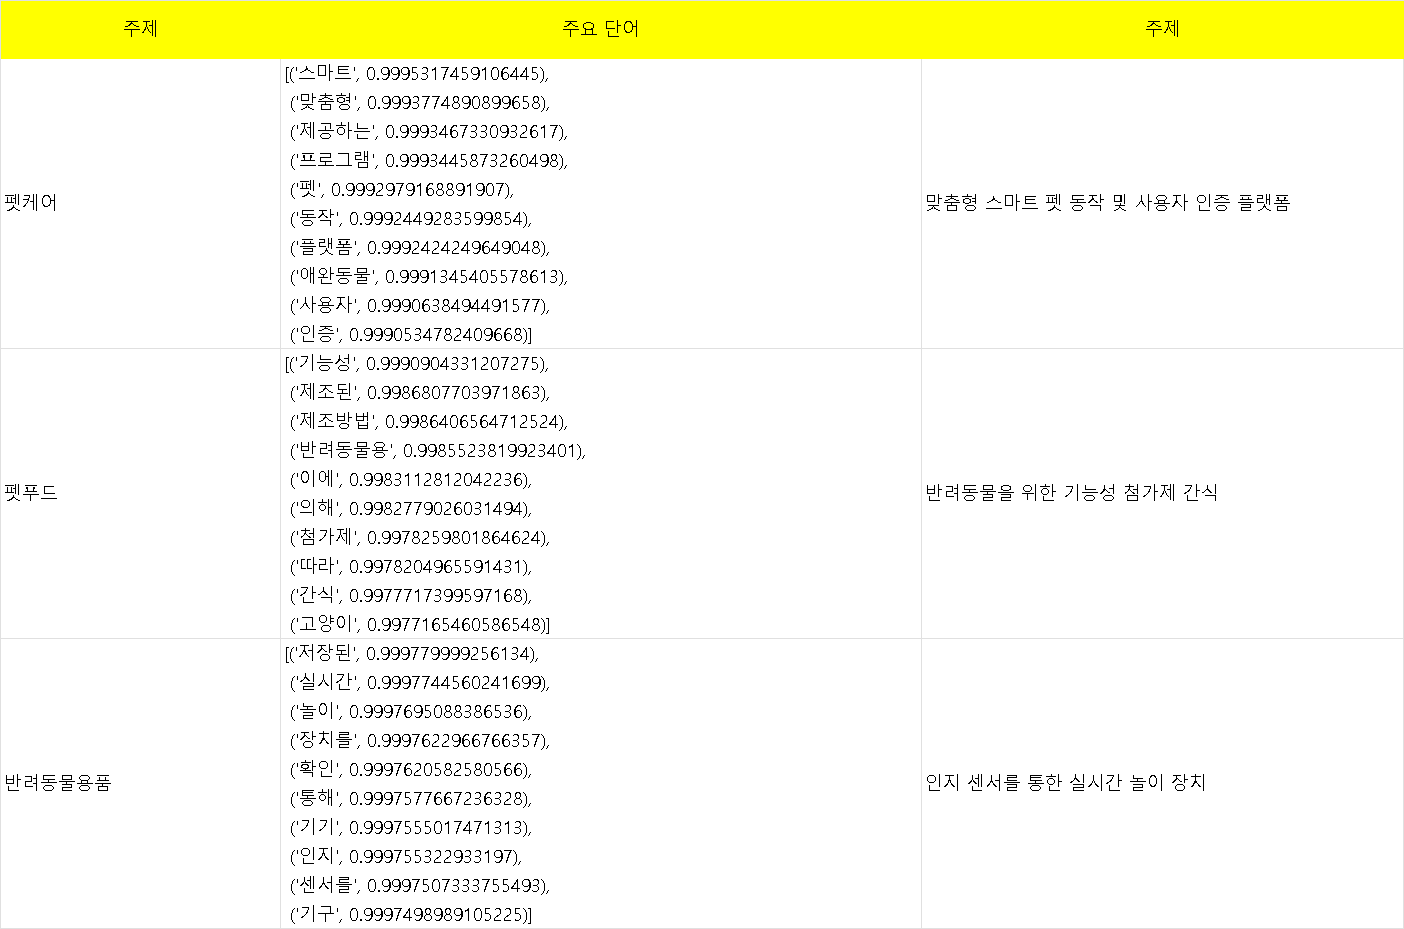